## Set up dataset

You may choose any of the datasets included with Keras, or used in the course so far (including, for example, the percolation data).
(It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST
(same size data format, same number of classes, same number of training and test examples).

A more interesting choice would be CIFAR-10


## Set up model 

Set up a Keras model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset
(if you are using MNIST, say 2000 or 4000).


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set
should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this
(preferably higher than your target error-rate).

In [27]:
#importing modules
import keras as keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
import tensorflow
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate, Flatten
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [28]:
#Loading and splitting data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
# to use softmax, we need to alter the class representations from integers to 'one-hot'

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

In [30]:
# let's take a closer look at the one-hot representations

np.hstack( [y_train[:12].reshape([12,1]), y_train_one_hot[:12,:]] )

array([[9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [7., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Let's look at some of the images.

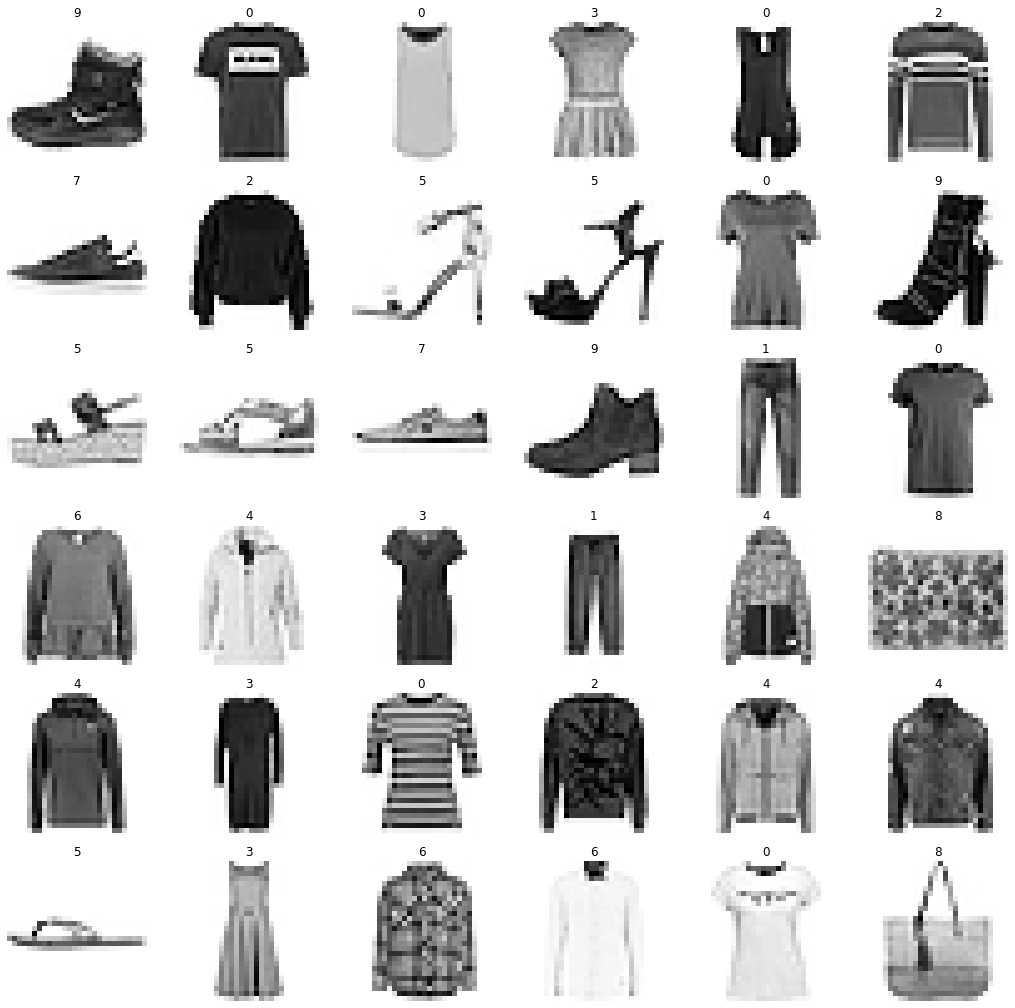

In [31]:
def plot_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):

    n_images = images_to_plot.shape[0]

    nrows = np.ceil(n_images/ncols).astype(int)

    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,0], cmap=cm.Greys )
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i])

plot_images( x_train[:36,:,:,:], titles= y_train[:36])

In [32]:
model=Sequential()
model.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(6,(3,3),padding='same'))  # A depth of only 6 convolutional filters here: do we need more to keep the information?
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
model.add(Flatten()) # reshapes the square array of the image into a vector
model.add(Dense(100)) # this is a pure linear transform
model.add(BatchNormalization())
model.add(Activation('tanh'))     # Activation is a layer that applies a non-linearity to its inputs


In [33]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [34]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 6)         330       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               117700    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)             

In [ ]:
#train_size=6000
#history = model.fit(x_train[:train_size,:,:,:],y_train_one_hot[:train_size,:],epochs=20,batch_size=64,shuffle=True, validation_data=(x_test, y_test_one_hot))
history = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 52s 860us/sample - loss: 2.4405 - accuracy: 0.6271 - sparse_categorical_crossentropy: 2.4405 - val_loss: 2.7664 - val_accuracy: 0.6700 - val_sparse_categorical_crossentropy: 2.7664

In [ ]:
def plot1(histories, key='sparse_categorical_crossentropy'):
     for i, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],'--', label=i.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label=i.title()+' Train')

     plt.xlabel('Epochs')
     plt.ylabel(key.replace('_',' ').title())
     plt.legend()

     plt.xlim([0,max(history.epoch)])


plot1([('',history),])

### 2.  Regularisation experiment:

Now select a type of regularisation (which may be L2, L1, L12, or dropout) and train your initial model with different
amounts of regularisation.

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation
may make performance on the validation set worse.

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of
different amounts of regularisation.

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.
 How does regularisation affect the performance of your initial network, and what is the optimal amount?

In [ ]:
#0.005 regularization
from keras import regularizers
l2_model = Sequential()
l2_model.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model.add(Dense(20, kernel_regularizer=regularizers.l2(0.005),activation=tf.nn.relu))
l2_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model_history = l2_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))

In [ ]:
from keras import regularizers
l2_model1 = Sequential()
l2_model1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model1.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu))
l2_model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model1_history = l2_model1.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))


In [ ]:
from keras import regularizers
l2_model2 = Sequential()
l2_model2.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model2.add(Dense(20, kernel_regularizer=regularizers.l2(0.01),activation=tf.nn.relu))
l2_model2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model2_history = l2_model2.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))


In [ ]:
history1=l2_model_history.history
loss1=history1['loss']
val_loss1=history1['val_loss']
history2=l2_model1_history.history
loss2=history2['loss']
val_loss2=history2['val_loss']
history3=l2_model2_history.history
loss3=history3['loss']
val_loss3=history3['val_loss']
epoch=range(1,len(loss1)+1)
plt.plot(epoch,loss1,'h',label='Tr loss 01')
plt.plot(epoch,loss2,'b',label='Tr loss 02')
plt.plot(epoch,loss2,'s',label='Tr loss 03')
plt.plot(epoch,val_loss1,'r',label='val loss 01')
plt.plot(epoch,val_loss2,'g',label='val loss 02')
plt.plot(epoch,val_loss2,'o',label='val loss 03')
plt.title('Tr and Val loss by rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plot1([('l2', l2_model_history)])

In [ ]:
#dropout model

from keras import regularizers
d_model = Sequential()
d_model.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
d_model.add(Dense(20, kernel_regularizer=regularizers.l2(0.01),activation=tf.nn.relu))
d_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
d_model_history = d_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))

In [ ]:
plot1([('dropout', d_model_history)])

### 3.  Learning curve experiment:

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance
appear to improve as some power of the amount of data in the training set?  If so, by what power ?

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is
the training set size.  For your model, the rate of improvement of validation error with training set size may not be as
fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is.

In [ ]:
# your code here
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

from keras import regularizers
l2_model1 = Sequential()
l2_model1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model1.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu))
l2_model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model1_history = l2_model1.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))


In [ ]:
plot1([('l2', l2_model1_history)])

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

from keras import regularizers
l2_model1 = Sequential()
l2_model1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model1.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu))
l2_model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model1_history = l2_model1.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))


In [ ]:
plot1([('l2', l2_model1_history)])


### 4. Second model:  

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a
fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeata sections 2 (regularisation experiment), and determine whether it has better validation set performance than the
 first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data).

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first
and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training
set size for your second model?

In [ ]:
import tensorflow
from tensorflow import keras

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.python.keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate
from tensorflow.python.keras.regularizers import l1, l2, l1_l2
from tensorflow.python.keras.utils.np_utils import to_categorical

from tensorflow.python.keras.datasets import imdb

In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

from keras import regularizers
l2_model1 = Sequential()
l2_model1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1),activation="relu"))
l2_model1.add(Dense(20, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu))
l2_model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model1_history = l2_model1.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))



In [ ]:
plot1([('dropout', d_model_history)])